In [1]:
import pandas as

In [2]:
df = pd.read_csv("income.csv")

df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [13]:
from matplotlib import pyplot as plt

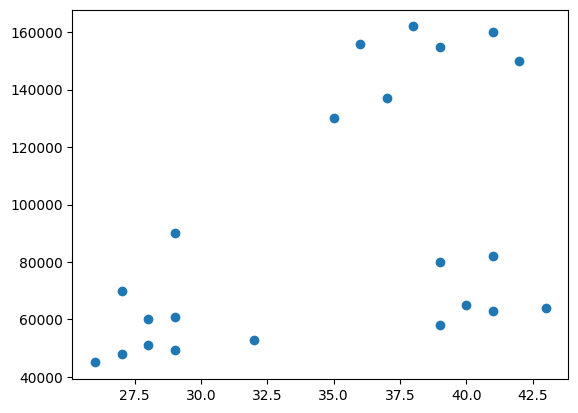

In [14]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

In [3]:
df.drop(columns = ["Name"] , inplace = True)

In [4]:
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [6]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [10]:
km = KMeans(n_clusters=3 , n_init='auto')
km.fit_transform(df[["Age" , "Income($)"]])
km.labels_

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [11]:
df["cluster"] = km.labels_
df.head()

,Age,Income($),cluster
0,27,70000,1
1,29,90000,2
2,29,61000,1
3,28,60000,1
4,42,150000,0


<Axes: xlabel='Age', ylabel='Income($)'>

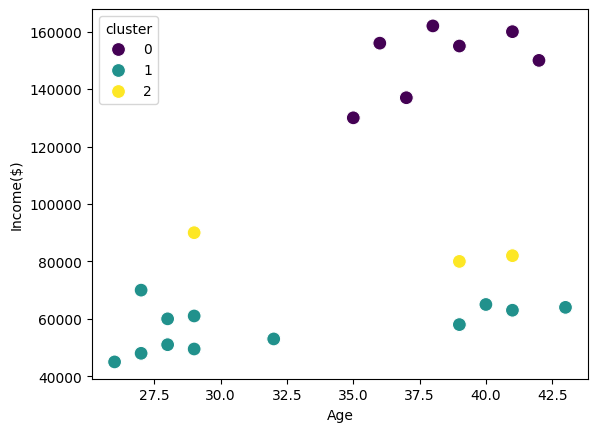

In [22]:
import seaborn as sns

sns.scatterplot(df , x  = df["Age"] , y = df["Income($)"] , palette='viridis' , s = 100, hue = "cluster")

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(columns=['Age', 'Income($)'])

df_scaled[["Age", "Income($)"]] = scaler.fit_transform(df[["Age", "Income($)"]])
df_scaled.head()



,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [30]:
km = KMeans(n_clusters=3 , n_init='auto')
km.fit_transform(df_scaled[["Age" , "Income($)"]])
km.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [31]:
df_scaled["clusters"]  = km.labels_

In [32]:
df_scaled.head()

,Age,Income($),clusters
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [36]:
sns.scatterplot(df_scaled, x='Age', y='Income($)',  palette='viridis', s=100, hue="Cluster")

ValueError: Could not interpret value `Cluster` for `hue`. An entry with this name does not appear in `data`.